Question 3 [Marks 40]
Predicting Shopping Mall Sales. You will have to create a model to predict
revenue. Identify the model with the best params. Target Column -
Revenue. Please note: Visualisation is mandatory. You will receive 0 marks
if you do not add visualisation. Data Link -
https://github.com/edyoda/data-science-complete-tutorial/blob/master
/Data/Shopping_Revenue.csv

In [44]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
df = pd.read_csv(r"C:\Users\dell\Downloads\rev.csv")
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [46]:
df.shape

(137, 43)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [48]:
df.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,133.000000,133.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.323308,5.398496,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.080024,2.296044,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [49]:
df.drop(df[['Open Date','Id','P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']],axis=1,inplace=True)

In [50]:
df.head()

,City,City Group,Type,revenue
0,İstanbul,Big Cities,IL,5653753
1,Ankara,Big Cities,FC,6923131
2,Diyarbakır,Other,IL,2055379
3,Tokat,Other,IL,2675511
4,Gaziantep,Other,IL,4316715


DATA VISUALIZATIONS

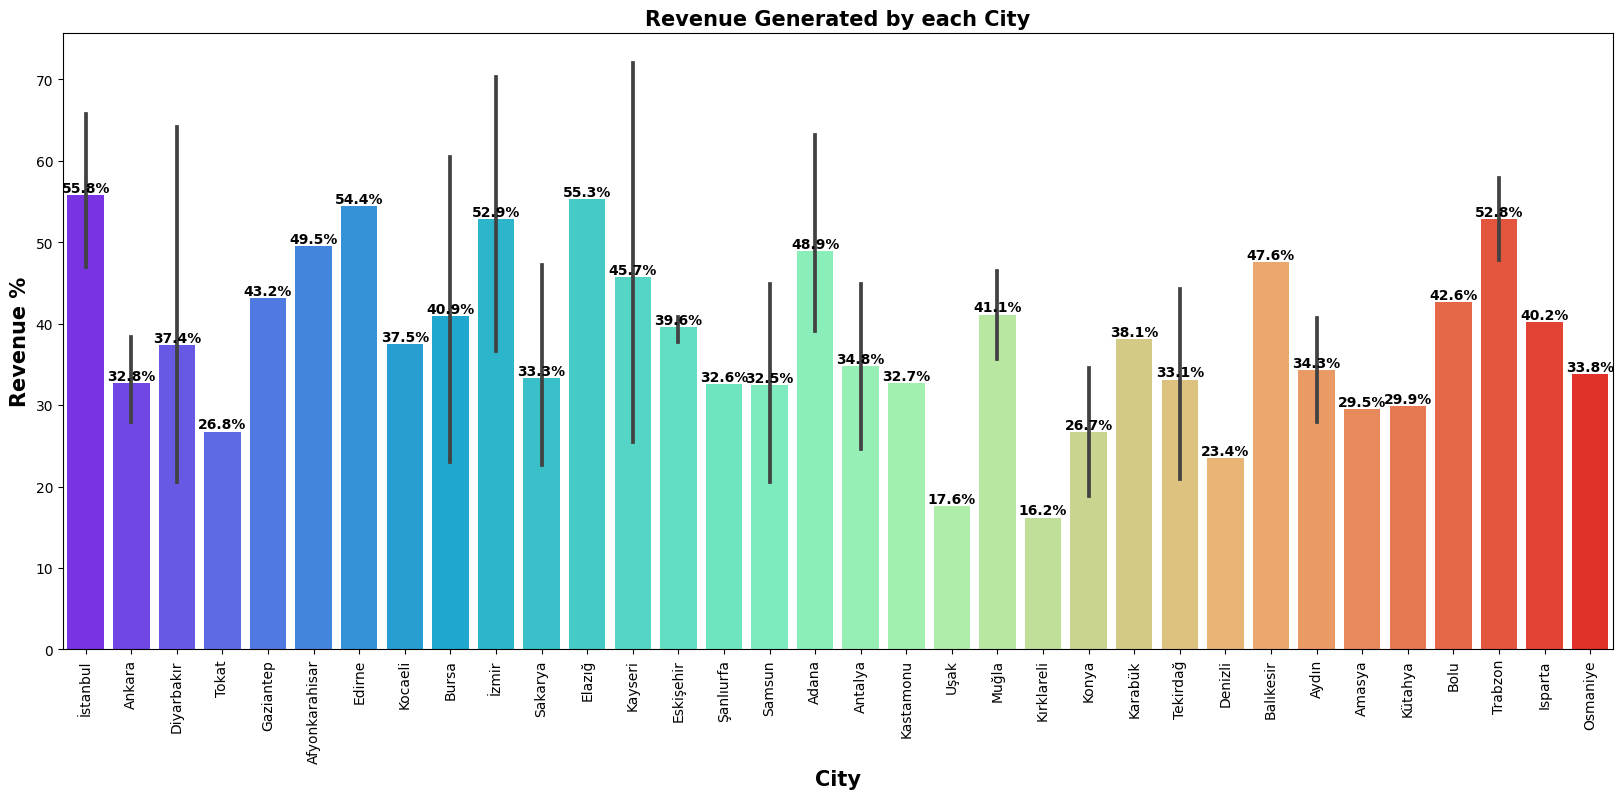

In [51]:
reference_value = 10000000  
df['rev_perct'] = ((df['revenue'] / reference_value) *100)
plt.figure(figsize=(20,8))
rev = sns.barplot(x= df["City"], y= df['rev_perct'], palette= "rainbow")
plt.title('Revenue Generated by each City', fontsize= 15, fontweight= "bold")
plt.xlabel("City", fontsize= 15, fontweight= "bold")
plt.ylabel("Revenue %", fontsize= 15, fontweight= "bold")
rev.bar_label(rev.containers[0], fmt='%.1f%%', fontweight= "bold")
plt.xticks(rotation=90)
plt.show()

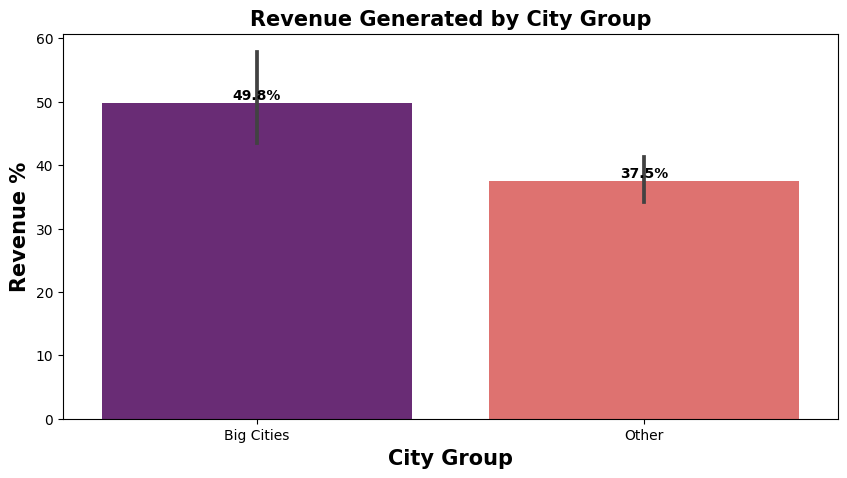

In [52]:
plt.figure(figsize=(10,5))
rev = sns.barplot(x= df["City Group"], y= df['rev_perct'], palette= "magma")
plt.title('Revenue Generated by City Group', fontsize= 15, fontweight= "bold")
plt.xlabel("City Group", fontsize= 15, fontweight= "bold")
plt.ylabel("Revenue %", fontsize= 15, fontweight= "bold")
rev.bar_label(rev.containers[0], fmt='%.1f%%', fontweight= "bold")
plt.xticks(rotation=0)
plt.show()

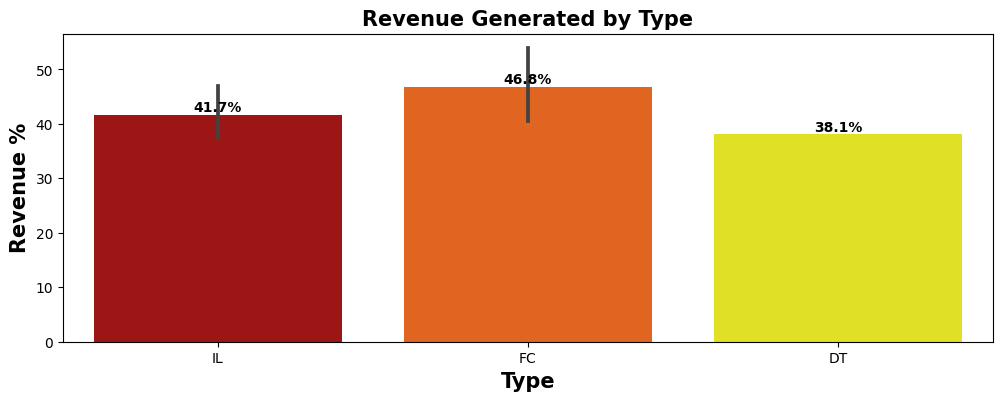

In [53]:
plt.figure(figsize=(12,4))
rev = sns.barplot(x= df["Type"], y= df['rev_perct'], palette= "hot")
plt.title('Revenue Generated by Type', fontsize= 15, fontweight= "bold")
plt.xlabel("Type", fontsize= 15, fontweight= "bold")
plt.ylabel("Revenue %", fontsize= 15, fontweight= "bold")
rev.bar_label(rev.containers[0], fmt='%.1f%%', fontweight= "bold")
plt.xticks(rotation=0)
plt.show()

In [54]:
df.columns

Index(['City', 'City Group', 'Type', 'revenue', 'rev_perct'], dtype='object')

In [55]:
#ENCODING CITY COLUMNS
le = LabelEncoder()
df["City"] = le.fit_transform(df["City"])
print("real labels is", le.classes_)

real labels is ['Adana' 'Afyonkarahisar' 'Amasya' 'Ankara' 'Antalya' 'Aydın' 'Balıkesir'
 'Bolu' 'Bursa' 'Denizli' 'Diyarbakır' 'Edirne' 'Elazığ' 'Eskişehir'
 'Gaziantep' 'Isparta' 'Karabük' 'Kastamonu' 'Kayseri' 'Kocaeli' 'Konya'
 'Kütahya' 'Kırklareli' 'Muğla' 'Osmaniye' 'Sakarya' 'Samsun' 'Tekirdağ'
 'Tokat' 'Trabzon' 'Uşak' 'İstanbul' 'İzmir' 'Şanlıurfa']


In [56]:
df.head()

,City,City Group,Type,revenue,rev_perct
0,31,Big Cities,IL,5653753,56.53753
1,3,Big Cities,FC,6923131,69.23131
2,10,Other,IL,2055379,20.55379
3,28,Other,IL,2675511,26.75511
4,14,Other,IL,4316715,43.16715


SPLITTING DATA

In [57]:
X = df["City"]
y = df["revenue"]

In [58]:
X = X.values.reshape(-1,1)

In [59]:
X_train, X_test, y_train, y_test = ms.train_test_split(X,y,train_size= 0.8,test_size=0.2, random_state= 2)

In [60]:
y_train.head()

78     3871344
126    4015749
11     5161370
130    3376145
48     7201784
Name: revenue, dtype: int64

LINEAR REGRESSION MODEL

In [61]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)

In [62]:
li_reg_mdl = sm.OLS(y_train, X_train_sm).fit()

In [63]:
li_reg_mdl.params

const    3.506598e+06
x1       4.711336e+04
dtype: float64

In [64]:
li_reg_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     5.060
Date:                Mon, 05 Jun 2023   Prob (F-statistic):             0.0265
Time:                        22:51:28   Log-Likelihood:                -1762.6
No. Observations:                 109   AIC:                             3529.
Df Residuals:                     107   BIC:                             3535.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.507e+06   5.02e+05      6.990      0.000    2.51e+06     4.5e+06
x1          4.711e+04   2.09e+04      2.250      0.027    5594.862    8.86e+04
==============================================================================
Omnibus:                       88.985   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.073
Skew:                           2.686   Prob(JB):                    4.46e-167
Kurtosis:                      14.824   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
Y_train_pred = li_reg_mdl.predict(X_train_sm)
errors = (y_train - Y_train_pred)
errors

78     2.234057e+05
126   -1.975497e+05
11     1.942576e+05
130   -1.261174e+06
48     2.847145e+06
           ...     
75     1.158195e+07
43    -9.152933e+05
22    -3.985527e+05
72    -2.488851e+06
15    -1.748194e+06
Name: revenue, Length: 109, dtype: float64

C:\Users\dell\AppData\Local\Temp\ipykernel_9908\909450435.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, bins=20)


<Axes: xlabel='revenue', ylabel='Density'>

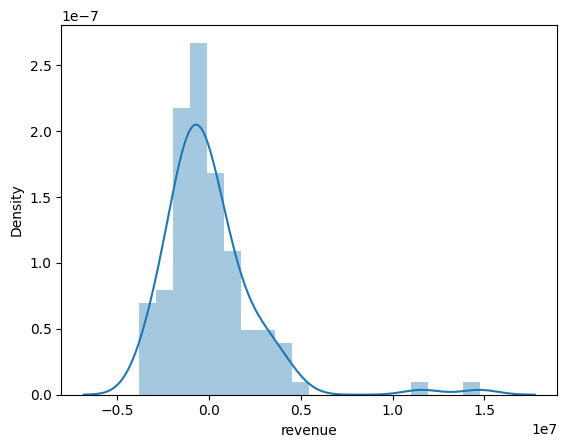

In [66]:
fig = plt.figure()
sns.distplot(errors, bins=20)

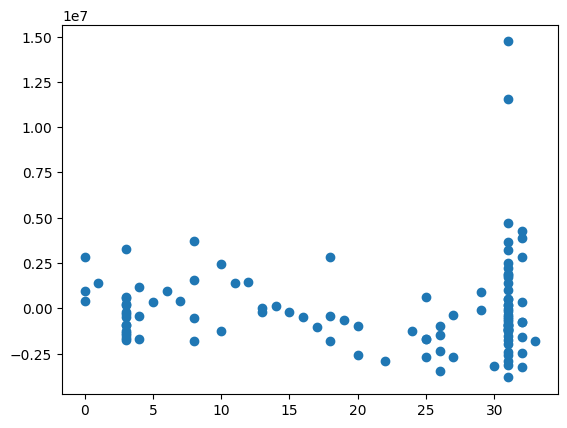

In [67]:
plt.scatter(X_train, errors)

STATISTICAL MODEL

In [68]:
X_test_sm = sm.add_constant(X_test)

In [69]:
Y_preds = li_reg_mdl.predict(X_test_sm)
Y_preds

array([3742165.066547  , 4590205.53932594, 4967112.41611657,
       3647938.34734935, 3695051.70694818, 4825772.33732008,
       4967112.41611657, 4495978.82012828, 3647938.34734935,
       4967112.41611657, 4967112.41611657, 4967112.41611657,
       4967112.41611657, 3977731.86454115, 4119071.94333764,
       3930618.50494232, 4967112.41611657, 3600824.98775052,
       3883505.14534349, 4967112.41611657, 4967112.41611657,
       4731545.61812242, 4967112.41611657, 4967112.41611657,
       4778658.97772125, 3647938.34734935, 4590205.53932594,
       3647938.34734935])

In [70]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [71]:
np.sqrt(mean_squared_error(y_test, Y_preds))

2173652.262653806

In [72]:
r_score = r2_score(y_test, Y_preds)
r_score

0.17135902491374555

RANDOM FOREST MODEL

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [74]:
rf_classifier = RandomForestClassifier(random_state= 20)
rf_classifier.fit(X_train_sm, y_train)

RandomForestClassifier(random_state=20)

In [75]:
y_pred1 = rf_classifier.predict(X_test_sm)
accuracy = accuracy_score(y_test, y_pred1)
accuracy

0.0

SVM MODEL

In [76]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test_sm)

In [78]:
X_train = pd.DataFrame(X_train_sm)
X_test = pd.DataFrame(X_test_sm)
X_train.describe()

,0,1
count,109.0,109.000000
mean,1.0,20.862385
std,0.0,11.823915
min,1.0,0.000000
25%,1.0,8.000000
50%,1.0,26.000000
75%,1.0,31.000000
max,1.0,33.000000


In [79]:
svm_cls = SVC(kernel='linear', random_state= 2)
svm_cls.fit(X_train_sm, y_train)
y_pred2 = svm_cls.predict(X_test_sm)
svm_accuracy = accuracy_score(y_test, y_pred2)
svm_accuracy

0.0

LOGISTIC REGRESSION

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
Log_reg = LogisticRegression()
Log_reg.fit(X_train_sm,y_train)
y_pred3 = Log_reg.predict(X_test_sm)

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
log_accuracy = accuracy_score(y_test,y_pred3)
log_accuracy

0.0

From above predictions the Linear regression model is predicting some better score WITH ACCURACY OF 0.17